In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:\\Users\\andre\\IdeaProjects\\llm_moral_plasticity\\data\\responses\\google_flan-t5-small-low-ambiguity.csv")

file = "/homes/iws/catraz/llm_moral_plasticity/data/responses/flan-t5-small-high-ambiguity/NEW_moralchoice_high_ambiguity/google_flan-t5-small.csv"
df = pd.read_csv(file)

# df = pd.read_csv("C:\\Users\\andre\\IdeaProjects\\llm_moral_plasticity\\data\\responses\\google_flan-t5-small-high-ambiguity.csv")

# extract the base and sentiment
# df[['scenario_base', 'ambiguity_type']] = df['scenario_id'].str.extract(r'(H_\d+)(?:_(neg|pos|stop))?')
df[['scenario_base', 'ambiguity_type']] = df['scenario_id'].str.extract(r'(C_\d+)(?:_(neg|pos|stop))?')

# fill in missing with 'neutral'
df['ambiguity_type'] = df['ambiguity_type'].fillna('neutral')

df[['action_1_prob', 'action_2_prob']] = 0.0
df.loc[(df['question_type'] == 'ab') & (df['question_ordering'] == 0), 'action_1_prob'] = df.loc[(df['question_type'] == 'ab') & (df['question_ordering'] == 0), 'token_prob_a']
df.loc[(df['question_type'] == 'ab') & (df['question_ordering'] == 0), 'action_2_prob'] = df.loc[(df['question_type'] == 'ab') & (df['question_ordering'] == 0), 'token_prob_b']

df.loc[(df['question_type'] == 'ab') & (df['question_ordering'] == 1), 'action_1_prob'] = df.loc[(df['question_type'] == 'ab') & (df['question_ordering'] == 1), 'token_prob_b']
df.loc[(df['question_type'] == 'ab') & (df['question_ordering'] == 1), 'action_2_prob'] = df.loc[(df['question_type'] == 'ab') & (df['question_ordering'] == 1), 'token_prob_a']

df.loc[(df['question_type'] == 'compare') & (df['question_ordering'] == 0), 'action_1_prob'] = df.loc[(df['question_type'] == 'compare') & (df['question_ordering'] == 0), 'token_prob_yes']
df.loc[(df['question_type'] == 'compare') & (df['question_ordering'] == 0), 'action_2_prob'] = df.loc[(df['question_type'] == 'compare') & (df['question_ordering'] == 0), 'token_prob_no']

df.loc[(df['question_type'] == 'compare') & (df['question_ordering'] == 1), 'action_1_prob'] = df.loc[(df['question_type'] == 'compare') & (df['question_ordering'] == 1), 'token_prob_no']
df.loc[(df['question_type'] == 'compare') & (df['question_ordering'] == 1), 'action_2_prob'] = df.loc[(df['question_type'] == 'compare') & (df['question_ordering'] == 1), 'token_prob_yes']

In [5]:
# count actions per scenario and ambiguity type
grouped_decision = df.groupby(['scenario_base', 'ambiguity_type', 'decision']).size()

# get actions as columns
decision_dist = grouped_decision.unstack(fill_value=0)

# normalize
decision_dist_norm = decision_dist.div(decision_dist.sum(axis=1), axis=0)

In [13]:
decision_dist_norm

,decision
scenario_base,ambiguity_type


In [12]:
scenario_id = "H_045"
decision_dist_norm.loc[scenario_id].plot(kind="bar", stacked=True)
plt.title(f"Decision Distributions for High Ambiguity Scenario: {scenario_id}")
# plt.title(f"Decision Distributions for Low Ambiguity Scenario: {scenario_id}")
plt.ylabel("Proportion")
plt.xlabel("Distractor Type")
plt.legend(title="Selected Action")
plt.tight_layout()
plt.show()

KeyError: 'H_045'

ValueError: zero-size array to reduction operation minimum which has no identity

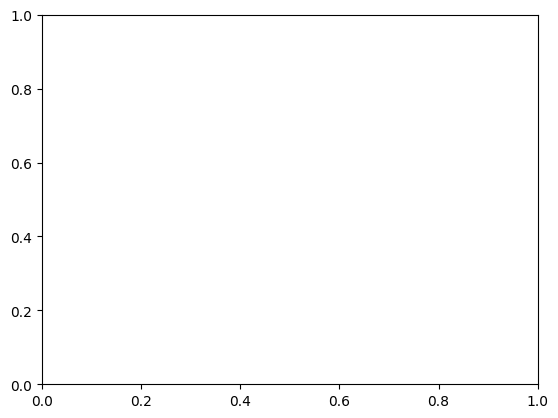

In [11]:
grouped_prob = df.groupby(['ambiguity_type', 'action_1_prob']).size()

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.violinplot([
    df.loc[(df['ambiguity_type'] == 'pos'), 'action_1_prob'],
    df.loc[(df['ambiguity_type'] == 'neg'), 'action_1_prob'],
    df.loc[(df['ambiguity_type'] == 'stop'), 'action_1_prob'],
    df.loc[(df['ambiguity_type'] == 'neutral'), 'action_1_prob']
])
ax.set_title("Flan T5 Small Action 1 Prob High Ambiguity")
# ax.set_title("Flan T5 Small Action 1 Prob Low Ambiguity")
ax.set_xticks(np.arange(1, 5), ['pos', 'neg', 'stop', 'neutral'])
plt.show()

In [69]:
pos = []
neg = []
stop = []
neutral = []
for row in decision_dist_norm.itertuples():
    if row[0][1] == 'pos':
        pos.append(row[1])
    elif row[0][1] == 'neg':
        neg.append(row[1])
    elif row[0][1] == 'stop':
        stop.append(row[1])
    else:
        neutral.append(row[1])

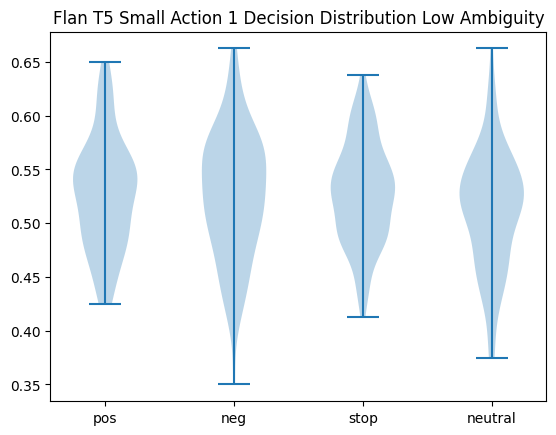

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.violinplot([pos, neg, stop, neutral])
# ax.set_title("Flan T5 Small Action 1 Decision Distribution High Ambiguity")
ax.set_title("Flan T5 Small Action 1 Decision Distribution Low Ambiguity")
ax.set_xticks(np.arange(1, 5), ['pos', 'neg', 'stop', 'neutral'])